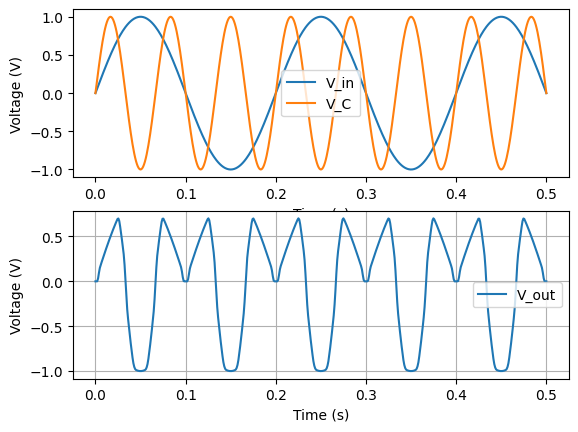

In [19]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 512
t = np.linspace(0, 0.5, num_steps)  # 0.5 second duration

A = 1.0  # Amplitude
f = 5.0  # Frequency in Hz
omega = 2 * np.pi * f  # Angular frequency

V_in = A * np.sin(omega * t)
V_C = A * np.sin(3 * omega * t)
V_out = np.zeros(num_steps)

# from this paper:
# https://www.dafx.de/paper-archive/2011/Papers/66_e.pdf
# using constants from here:
# https://github.com/bbc/webaudio.prototyping.bbc.co.uk/blob/master/src/ring-modulator.coffee

v_b = 0.2
v_L = 0.4
h = 1.0

# approximates the transfer function of a diode in series with a resistor
def piecewise_waveshaper(v):
    if v <= v_b:
        return 0
    elif v <= v_L:
        return h * ((v - v_b)**2 / (2*v_L - 2*v_b))
    else:
        return h*v - h*v_L + h * ((v_L - v_b)**2 / (2*v_L - 2*v_b))

for i in range(1, num_steps):
    V_out[i] = \
      piecewise_waveshaper(+1.0 * (V_C[i] + 0.5 * V_in[i])) + \
      piecewise_waveshaper(-1.0 * (V_C[i] + 0.5 * V_in[i])) - \
      piecewise_waveshaper(+1.0 * (V_C[i] - 0.5 * V_in[i])) - \
      piecewise_waveshaper(-1.0 * (V_C[i] - 0.5 * V_in[i]))


plt.subplot(2, 1, 1)
plt.plot(t, V_in, label='V_in')
plt.plot(t, V_C, label='V_C')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, V_out, label='V_out')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)


plt.show()